<a href="https://colab.research.google.com/github/itsdivya1309/Machine-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Possum Regression**

1. Can we use total length to predict a possum's head length?
2. Which possum body dimensions are most correlated with age and sex?
3. Can we classify a possum's sex by its body dimensions and location?
4. Can we predict a possum's trapping location from its body dimensions?

Clearly, part 1 can be solved by linear regression with single variable.

**1. Importing the required libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import sklearn

**2. Importing dataset**

Will be using possum dataset, available on kaggle.

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download -d abrambeyer/openintro-possum

openintro-possum.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip openintro-possum.zip

Archive:  openintro-possum.zip
replace possum.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: possum.csv              


In [ ]:
dataset = pd.read_csv('possum.csv')

In [ ]:
dataset.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


**3. Data Analysis**

Since I only need total length and head length of the possum; I'll be doing the following things in this step:
1. Make a matrix of head length. (dependent variable)
2. Make a matrix of total length. (predictor variable)
3. Draw a scatterplot between the two.

In [ ]:
X = np.array(dataset['totlngth']).reshape(104,1)
y = np.array(dataset['hdlngth']).reshape(104,1)

In [ ]:
#Checking the shape
X.shape

(104, 1)

In [ ]:
y.shape

(104, 1)

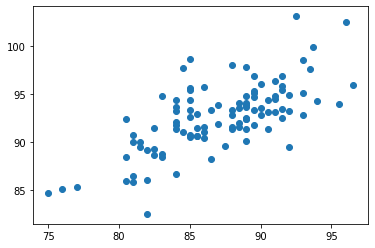

In [ ]:
plt.scatter(X,y)

**4. Splitting into training and testing dataset**

Before splitting the dataset, we create our hypothesis:
h(x) = t

```
   h(x) = theta0 + theta*x = prediction
=> theta0*1 + thata*x = prediction
=> [1 x][theta0 theta1]' = prediction
```
Here dimensions of [1  x] = (m,2)
[theta0 theta1]' = (2,1)
prediction = (m,1)

So, before splitting into training and testing datasets, I have to add modify X and create a theta array.



In [ ]:
one = np.ones(y.shape)

In [ ]:
one.shape

(104, 1)

In [ ]:
X = np.append(one,X, axis = 1)

In [ ]:
X.shape

(104, 2)

In [ ]:
#Creating theta array
theta0,theta1 = 0,0
theta = np.array([theta0,theta1]).reshape(2,1)
theta.shape

(2, 1)

In [ ]:
#Now, splitting into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
X_train.shape

(78, 2)

In [ ]:
y_test.shape

(26, 1)

**5. Creating the model**

In [ ]:
y_pred = np.dot(X_train,theta)

In [ ]:
#Cost function using numpy
MSE = ((y_pred - y_train)**2)/(2*78)
#MSE = np.square(np.subtract(y_pred,y_train)).mean()/2

In [ ]:
#Setting arbitrary alpha
alpha = 0.01

In [ ]:
#Updating theta:
costFunction = list(np.zeros((1000,1)))
for iter in range(1000):
  y_pred = np.dot(X_train,theta)
  MSE = ((y_pred - y_train)**2)/(2*78)
  costFunction[iter]= MSE
  theta = np.subtract(theta,np.square(np.subtract(y_pred,y_train))/78)
  #theta = theta - (alpha/78)((y_pred-y_train)**2)
costFunction.min()

ValueError: ignored

In [ ]:
A = np.array([[1,3,5],[2,4,6]])
B = np.array([[2,5,7],[1,3,5]])
((A-B)**2)/4

array([[0.25, 1.  , 1.  ],
       [0.25, 0.25, 0.25]])